# <h><center> USA Road Accidents <center></h>
![title](title1.png) <br/><br/><br/><br/><br/>

## Import der notwendigen Module

In [ ]:
pip install -U notebook-as-pdf

In [ ]:
!pyppeteer-install

In [130]:
###################################### Python Basic Libraries      #######################################
import random
import math
##################################### Basic Data Science Libraries ###################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import seaborn as sns

from numpy.random import seed
from numpy.random import randn

from pylab import rcParams
################################### Machine Learning Libraries ####################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import Normalizer
from sklearn.neural_network import MLPClassifier
################################### Geospatial Data Science Libraries #######################################
import geopandas as gpd
import geoplot  as gplt

## Style Einstellung von Jupyter Notebook 

In [131]:
plt.style.use('seaborn-dark')
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
pd.set_option("display.max_rows", 1000)

## Einlesen von Data

In [132]:
df = pd.read_csv("US_Accidents_Dec20.csv")

## 1 Fragen die durch Analayse beantwortet werden sollen
- Sind einige Unfall Hot Spots auf der USA Karte zu erkennen? Wenn ja, zeichnen sie sich durch irgendwelche besondere Merkmale?
- Welche Straßen in der USA sind besonders gefährlich?

<br>*Diese Fragen versuche ich durch die decriptive statistics zu beantworten*<br><br>

- Welche Eigenschaften haben Einfluss auf Schweregrad eines Unfalls? Kann die Schwere durch einen ML  Model antizipiert werden?

<br>*Diese Frage versuche ich mit Hilfe von Inference zu beantworten (im diesen Fall neural network model von sklearn)*<br>

## 2 Überblick und first check von Daten. Behandlung von Null Values.

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.head().iloc[:, 10:]

,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,...,False,False,False,False,False,False,Night,Night,Night,Night
1,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,...,False,False,False,False,False,False,Night,Night,Night,Day
2,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,...,False,False,False,False,True,False,Night,Night,Day,Day
3,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,...,False,False,False,False,False,False,Night,Day,Day,Day
4,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

#### Einzelfehler in Daten sind zu beheben

In [7]:
df.Side.value_counts() # One record without defined side

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [8]:
df = df.loc[(df.Side == "R") | (df.Side == "L")]

In [9]:
df.Side.value_counts() #Issue fixed

R    3467079
L     765461
Name: Side, dtype: int64

### Entfernung von Eigenschaften mit konstanten Werten

In [10]:
for column in df:
    if len(df[column].value_counts()) < 2:
        print("dropping:", column)
        df.drop(axis = 1, columns = [column], inplace = True)

dropping: Country
dropping: Turning_Loop


### Überprüfung ob ID Spalte nur die unikalen Werten beinhaltet

In [11]:
if df.ID.duplicated().mean() == 0:
    print("The data is unique")
else:
    print("We have duplicates in the id column!")

The data is unique


### Überprüfung der Daten in Hinblick auf Null Values

In [12]:
def show_incomplete_data(data_frame, threshold = 1):
    """This function provides the data completness level.
        threshold -> takes values from 0 to 1 and represents agreed level for a series to be 
        considered as complete"""
    return (data_frame.notnull().sum() / len(data_frame)).loc[
    (data_frame.notnull().sum() / len(df) < threshold)].sort_values()

In [13]:
show_incomplete_data(df)

End_Lat                  0.358192
End_Lng                  0.358192
Number                   0.364932
Precipitation(in)        0.511974
Wind_Chill(F)            0.552042
TMC                      0.641808
Wind_Speed(mph)          0.886752
Visibility(mi)           0.976688
Weather_Condition        0.976756
Humidity(%)              0.977445
Temperature(F)           0.978760
Wind_Direction           0.980246
Pressure(in)             0.981953
Weather_Timestamp        0.985199
Airport_Code             0.997880
Timezone                 0.998910
Zipcode                  0.999695
Nautical_Twilight        0.999967
Sunrise_Sunset           0.999967
Civil_Twilight           0.999967
Astronomical_Twilight    0.999967
City                     0.999968
Description              1.000000
dtype: float64

#### Wie oben dargestellt bei mancher Eigenschaften haben wir fehlende Daten. Einige Spalten sind jedoch fast komplett. Da der ganze Data Set sehr groß ist, können kleine Datenlucken akzeptiert werden. Unten zeige ich die unkompletten Daten wo 85% Niveau von Data Completness nicht erreicht wurde.

In [14]:
show_incomplete_data(df, .85)

End_Lat              0.358192
End_Lng              0.358192
Number               0.364932
Precipitation(in)    0.511974
Wind_Chill(F)        0.552042
TMC                  0.641808
dtype: float64

- **Die Spalten *`End_Lat`*, *`End_Lng`* sind nicht notwendig für die Beantwortung früher gestellter Fragen. Sie werden also einfach entfernt**
<br>

- **Die Spalte *`Number`* stellt die Hausnummer bei denen der bestimmte Unfall passierte. Sie ist sogar gefährlich im Hinblick auf overfitting von ML Models. Diese Spalte wird also auch entfern**
<br>

- **Die Spalten *`Wind_Chill`* und *`Precipitation`* werden  mit Hilfe von analytischen Ansätzen ergänzt oder vernachlässigt  - vorausgesetzt, dass strenge Zusammenhänge mit anderen Eigenschaften bestehen**
<br>

- **The Spalte *`TMC`* wird vereinfacht. Momentan sie zeigt Kannalnummer für die Unfallbeschreibung. Für die Zwecke der bestehenden Analyse, wird das ganze vereinfacht zu zwei Positionen (1 für Meldung und 0 für keine Information über Meldung)**
<br>



#### Dropping "Number, "End_Lat", "End_Lng"

In [15]:
df.drop(axis = 1, columns = ["Number", "End_Lat", "End_Lng"], inplace = True)

#### Änderung von "TMC" Charakteristika

In [16]:
df.loc[(df.TMC >= 0), "TMC"] = 1
df.TMC.fillna(0, inplace = True)
df.TMC = df.TMC.astype(int)
df.TMC.value_counts()

1    2716476
0    1516064
Name: TMC, dtype: int64

### Behandlung der unkompletten Niederschlagsdaten

#### Suche nach Korrelationen zu den anderen Eigenschaften

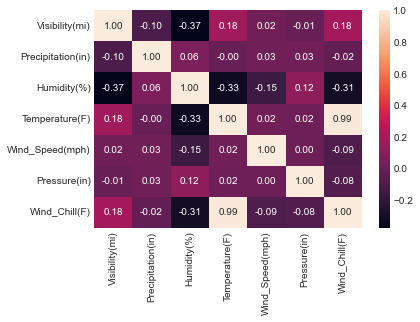

In [17]:
df_only_float = df[['Visibility(mi)', "Precipitation(in)", 
                   'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)', 
                    'Pressure(in)', "Wind_Chill(F)"]]
sns.heatmap(df_only_float.corr(), annot = True, fmt = '.2f');

####  Leider keine große Korrelationen mit dem Niederschlag konnten erkannt werden.Starke Korrelation zwischen "Wind Chill" und "Temperature".  Die "Wind Chill" kann entfernt werden.

In [18]:
df.drop(axis = 1, columns = "Wind_Chill(F)", inplace = True)

#### Da keine Korrelationen zwischen Niederschlag und anderen Eigenschaften identifiziert wurden,  habe ich Entscheidung getroffen die dementsprechende Wetterverhältnisse anzuschauen.

In [19]:
df.loc[df["Precipitation(in)"].isnull()].Weather_Condition.value_counts().head()

Clear               803332
Overcast            327980
Mostly Cloudy       299495
Partly Cloudy       213173
Scattered Clouds    200021
Name: Weather_Condition, dtype: int64

#### Entsprechend offizieller Definition die Wetterverhältnisse "fair" oder "clear" bedeuten keinen Niederschlag

In [20]:
df.loc[(df.Weather_Condition == "Fair") | (df.Weather_Condition == "Clear")
       , "Precipitation(in)"] = 0.0

#### Allerdings haben wir immer noch Mangel von circa 30%

In [21]:
show_incomplete_data(df, .85)

Precipitation(in)    0.711171
dtype: float64

#### Man kann merken die typischen Wetterverhältnisse die mit Niederschlag, keinen Niederschlag oder Null Value der Niederschlag verbunden sind.

In [22]:
df.loc[df["Precipitation(in)"] > 0].Weather_Condition.value_counts().head()

Light Rain    124652
Rain           37757
Overcast       20795
Light Snow     17302
Cloudy         16512
Name: Weather_Condition, dtype: int64

In [23]:
df.loc[df["Precipitation(in)"] == 0].Weather_Condition.value_counts().head()

Fair             900872
Clear            808180
Cloudy           297839
Mostly Cloudy    259423
Partly Cloudy    181848
Name: Weather_Condition, dtype: int64

In [24]:
df.loc[df["Precipitation(in)"].isnull()].Weather_Condition.value_counts().head()

Overcast            327980
Mostly Cloudy       299495
Partly Cloudy       213173
Scattered Clouds    200021
Haze                 27329
Name: Weather_Condition, dtype: int64

#### Die Null Values von Niederschlag sind verbunden mit "fraglischen" Wetterverhältnissen. Die Distributionen von Niederschlag bei solchen Verhältnissen sind unten angeführt.

In [25]:
df_precip_given = df.loc[df["Precipitation(in)"] > 0]

In [26]:
def show_distribution(data_frame, feature, ass_feature, value_ass_feature, distr_start = 0, 
                     distr_end = 1, distr_step = 0.1, histogram_step = 0.01):
    """This function shows distribution of particular series in a data frame, depending 
    on another (associated) feature. User can choose distribution's start, end and step"""
    data_frame = data_frame.loc[data_frame[ass_feature] == value_ass_feature]
    distribution = data_frame[feature].describe(percentiles = np.arange(distr_start, distr_end, distr_step))
    
    bins = np.arange(0, distribution[-2], histogram_step)
    
    print(distribution)
    return plt.hist(data_frame[feature], bins)

count    20795.000000
mean         0.141088
std          1.000529
min          0.010000
0%           0.010000
10%          0.010000
20%          0.010000
30%          0.010000
40%          0.010000
50%          0.020000
60%          0.020000
70%          0.030000
80%          0.050000
90%          0.090000
max         10.800000
Name: Precipitation(in), dtype: float64


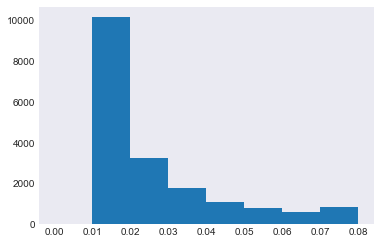

In [27]:
show_distribution(df_precip_given, "Precipitation(in)", "Weather_Condition", "Overcast");

count    12825.000000
mean         0.074608
std          0.460936
min          0.010000
0%           0.010000
10%          0.010000
20%          0.010000
30%          0.010000
40%          0.010000
50%          0.020000
60%          0.030000
70%          0.040000
80%          0.070000
90%          0.130000
max         10.040000
Name: Precipitation(in), dtype: float64


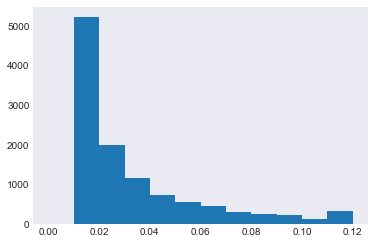

In [28]:
show_distribution(df_precip_given, "Precipitation(in)", "Weather_Condition", "Mostly Cloudy");

count    2394.000000
mean        0.154227
std         0.979246
min         0.010000
0%          0.010000
10%         0.010000
20%         0.010000
30%         0.010000
40%         0.010000
50%         0.020000
60%         0.030000
70%         0.040000
80%         0.070000
90%         0.140000
max        10.020000
Name: Precipitation(in), dtype: float64


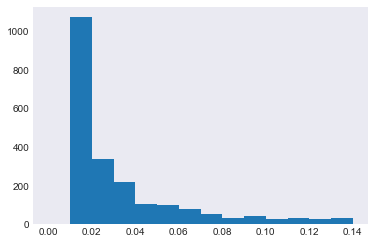

In [29]:
show_distribution(df_precip_given, "Precipitation(in)", "Weather_Condition", "Partly Cloudy");

count    1762.000000
mean        0.116039
std         0.752107
min         0.010000
0%          0.010000
10%         0.010000
20%         0.010000
30%         0.010000
40%         0.020000
50%         0.020000
60%         0.030000
70%         0.050000
80%         0.080000
90%         0.140000
max         9.990000
Name: Precipitation(in), dtype: float64


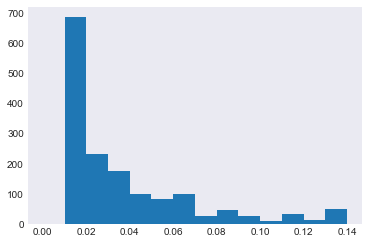

In [30]:
show_distribution(df_precip_given, "Precipitation(in)", "Weather_Condition", "Scattered Clouds");

#### Die Histograme zeigen zwei Sachen
- Es ist nicht sinvoll die nan values mit mode, median oder mean zu füllen. Es gibt weder großen Mode noch Normal Distribution. 
- Die Niederschlagswerte bei overcast, mostly cloudy, partly cloudy and scattered clouds sind sehr klein - es ist ja möglich, dass der Niederschlag so klein war, dass er sogar nicht ordentlich gemessen wurde - und deshalb null value.

#### 85% von nan values hervorkommt mit den Wetterverhätltnissen wie oben aufgeführt (siehe Zell unten)

In [31]:
len(df.loc[df["Precipitation(in)"].isnull()].loc[df.Weather_Condition.isin(["Scattered Clouds",
                                                                      "Partly Cloudy",
                                                                      "Mostly Cloudy",
                                                                      "Overcast" ])]) / \
len(df.loc[df["Precipitation(in)"].isnull()])

0.851276912505726

#### Das bringt mich zur Schlussforlgerung dass die Kategorie dieser Niederschlage ist "questionable".

#### Ich führe also ein neues Konzept wo ich Niederschlag als "Categorical" Eigenschaft einführe

**Umwandlung des Niederschlags in die Kategorien:**

In [32]:
df.loc[df["Precipitation(in)"] > 0]["Precipitation(in)"].describe(percentiles = np.arange(0,1,0.05))

count    287715.000000
mean          0.087478
std           0.370236
min           0.010000
0%            0.010000
5%            0.010000
10%           0.010000
15%           0.010000
20%           0.010000
25%           0.010000
30%           0.020000
35%           0.020000
40%           0.020000
45%           0.030000
50%           0.030000
55%           0.040000
60%           0.050000
65%           0.060000
70%           0.070000
75%           0.080000
80%           0.100000
85%           0.130000
90%           0.180000
95%           0.280000
max          25.000000
Name: Precipitation(in), dtype: float64

**Values 0 will be `no precipitations`**

**Null values will be `questionable precipitations`**

**Values 0,01 will be ` very small precipitations` (first quartile of precipitations)**

**Values 0,02 and 0,03 will be `small precipitations` (second quartile of precipitations)**

**Values 0,04 and 0,08 will be `moderate precipitations` (third quartile of precipitations)**

**Values above 0,08 will be `high precipitations` (fourth quartile of precipitations)**

In [33]:
df["Precipitation_Category"] = np.NaN

In [34]:
def change_into_category(data_frame, column, name, cat_col,
                         compared_value_equal = None, compared_value_bigger = None, 
                         compared_value_smaller = None, compared_value_bigger_equal = None, 
                         compared_value_smaller_equal = None):
    """
    column - variables to be changed into categorical ones
    name - category name for particular variable (variable is defined by comparison with some values
    (see further arguments)
    cat_col - categorical column name (containing all categorical labels)
    """
    
    """ One sided conditions """ """Two sided conditions""" """Equality condition"""
    
    if compared_value_smaller is not None:
        data_frame.loc[df[column] > compared_value_smaller, cat_col] = name
        


    elif compared_value_bigger is not None:
        data_frame.loc[df[column] < compared_value_bigger, cat_col] = name
        
   

    elif compared_value_smaller_equal is not None:
        data_frame.loc[df[column] >= compared_value_smaller_equal, cat_col] = name
        


    elif compared_value_bigger_equal is not None:
        data_frame.loc[df[column] <= compared_value_bigger_equal, cat_col] = name
        

    
    
    
    elif compared_value_smaller is not None and compared_value_bigger is not None:
        data_frame.loc[(df[column] > compared_value_smaller) & \
        (df[column] < compared_value_bigger)         , cat_col] = name
        
        #print(data_frame.loc[(df[column] > compared_value_smaller) & \
        #(df[column] < compared_value_bigger)].head())

             
    elif compared_value_smaller is not None and compared_value_bigger_equal is not None:
        data_frame.loc[(df[column] > compared_value_smaller) & \
        (df[column] <= compared_value_bigger_equal)   , cat_col] = name
       
        
        print(data_frame.loc[(df[column] > compared_value_smaller) & \
        (df[column] <= compared_value_bigger_equal)   , cat_col].head())

    
                                     
    elif compared_value_smaller_equal is not None and compared_value_bigger is not None:
        data_frame.loc[(df[column] >= compared_value_smaller_equal) & \
        (df[column] < compared_value_bigger)          , cat_col] = name
        

        print(data_frame.loc[(df[column] >= compared_value_smaller_equal) & \
        (df[column] < compared_value_bigger)   , cat_col].head())
        
        
        

    elif compared_value_smaller_equal is not None and compared_value_bigger_equal is not None:
        data_frame.loc[(df[column] >= compared_value_smaller_equal) & \
        (df[column] <= compared_value_bigger_equal)   , cat_col] = name 
        
        
        print(data_frame.loc[(df[column] >= compared_value_smaller_equal) & \
        (df[column] <= compared_value_bigger_equal)   , cat_col].head())
        
        
        


    

    elif compared_value_equal is not None:    
        data_frame.loc[df[column] == compared_value_equal, cat_col] = name
    
    return data_frame
 
    
    

In [35]:
change_into_category(df,"Precipitation(in)", "No_Precipitation", "Precipitation_Category", 0);                            


#print(df.Precipitation_Category.value_counts())

change_into_category(df,"Precipitation(in)", "Very_small", "Precipitation_Category",
                     compared_value_smaller = 0,
                     compared_value_bigger_equal = 0.01);
                          
#print(df.Precipitation_Category.value_counts())    
change_into_category(df,"Precipitation(in)", "Small", "Precipitation_Category",
                     compared_value_smaller_equal = 0.02,
                     compared_value_bigger_equal = 0.03);
                               
    
#print(df.Precipitation_Category.value_counts())    
change_into_category(df,"Precipitation(in)", "Moderate", "Precipitation_Category",
                     compared_value_smaller_equal = 0.04,
                     compared_value_bigger_equal = 0.08);
#print(df.Precipitation_Category.value_counts())
change_into_category(df,"Precipitation(in)", "High", "Precipitation_Category",
                     compared_value_smaller = 0.08);
                     
                               

In [36]:
df.Precipitation_Category.fillna("Questionable_Precipitation", inplace = True)

In [37]:
df.Precipitation_Category.value_counts()

No_Precipitation              2722345
Questionable_Precipitation    1222480
Very_small                      80399
High                            70545
Moderate                        69008
Small                           67763
Name: Precipitation_Category, dtype: int64

### Final data frame für weitere Bearbeitung

In [38]:
df_ppt_cat = df.drop(axis = 1, columns = ["Precipitation(in)"])

df_ppt_cat.dropna(inplace = True)
df_ppt_cat.reset_index(inplace = True)

df_ppt_cat.drop(axis = 1, columns = "index", inplace = True)

## 3 Feinschliffe vor der Weiterführung der Analyse

### Dropping unrelevanter Spalten

In [39]:
not_relevant_for_any_of_the_posed_questions = ["Source", "Description", "Zipcode", "Timezone", "Airport_Code", 
               "Weather_Timestamp"]

In [40]:
df_ppt_cat.drop(axis = 1, columns = not_relevant_for_any_of_the_posed_questions, inplace = True)

### Underscoring von Spaltennamen und Prüfung von Datentypen

In [41]:
def change_name_to_underscored(column_name):
    return column_name.replace("(", "_").replace(")", "").replace(" " ,"_")

In [42]:
for column in df_ppt_cat:
    df_ppt_cat.rename(columns = {column: change_name_to_underscored(column)}, inplace = True)    

### Datetime types für relevante Spalten

In [43]:
df_ppt_cat.Start_Time = pd.to_datetime(df_ppt_cat.Start_Time)
df_ppt_cat.End_Time = pd.to_datetime(df_ppt_cat.End_Time)

### Umwandlung booleans in integers

In [44]:
for column in df_ppt_cat.select_dtypes(bool):
    df_ppt_cat[column] = df_ppt_cat[column].astype(int)

### Umbennenung von "nicht descriptive" Spaltennamen

In [45]:
df_ppt_cat.rename(columns = {"Sunrise_Sunset": "After_Sunset", 
                     "Civil_Twilight": "After_Civil_Twilight",
                     "Nautical_Twilight" : "After_Nautical_Twilight",
                     "Astronomical_Twilight": "After_Astronomical_Twilight"}, inplace = True)

In [46]:
df_ppt_cat[["After_Sunset", "After_Civil_Twilight", "After_Nautical_Twilight", "After_Astronomical_Twilight"]]\
= df_ppt_cat[["After_Sunset", 
    "After_Civil_Twilight", 
    "After_Nautical_Twilight", 
    "After_Astronomical_Twilight"]].replace(["Night","Day"],  [1,0])

### Dummies für categorical Eigenschaften

In [47]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
        
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), 
                 pd.get_dummies(df[col], prefix=col, prefix_sep='_', 
                 drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [48]:
df_ppt_cat = create_dummy_df(df_ppt_cat, 
        ["Precipitation_Category", "Side", "Weather_Condition", "Wind_Direction"], dummy_na = False)

In [49]:
for column in df_ppt_cat:
    df_ppt_cat.rename(columns = {column: change_name_to_underscored(column)}, inplace = True) 

### Changing Lat and Lng to coordinates column (4th decimal place means around 10-20m accuracy)

In [50]:
df_ppt_cat["Coordinates_10m"] = list(zip(df_ppt_cat.Start_Lat.values.round(4), 
                                     df_ppt_cat.Start_Lng.values.round(4) ))
df_ppt_cat["Coordinates_100m"] = list(zip(df_ppt_cat.Start_Lat.values.round(3), 
                                     df_ppt_cat.Start_Lng.values.round(3) ))

### Changing Start_Time and End_Time into minutes (integer)

In [51]:
df_ppt_cat["Duration_minutes"] = (df_ppt_cat.End_Time.dt.round('min') 
                                  - df_ppt_cat.Start_Time.dt.round("min"))

df_ppt_cat.drop(axis = 1, columns = ["End_Time"], inplace = True)
df_ppt_cat.Duration_minutes = (df_ppt_cat.Duration_minutes.dt.seconds) / 60

In [52]:
df_ppt_cat.groupby("Severity")['Duration_minutes'].mean()

Severity
1     40.035460
2    109.903272
3     70.232078
4    197.439938
Name: Duration_minutes, dtype: float64

## 4 Analyse via Descriptive Statistics

In [53]:
continental_USA = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

### Undersampling (damit klarer Übersicht auf den Karten beibehalten wird)

In [54]:
sample_sev1 = df_ppt_cat.sample(20000)[["Severity","Start_Lng", "Start_Lat"]].query("Severity==1")
sample_sev2 = df_ppt_cat.sample(20000)[["Severity","Start_Lng", "Start_Lat"]].query("Severity==2")
sample_sev3 = df_ppt_cat.sample(20000)[["Severity","Start_Lng", "Start_Lat"]].query("Severity==3")
sample_sev4 = df_ppt_cat.sample(20000)[["Severity","Start_Lng", "Start_Lat"]].query("Severity==4")

In [55]:
def make_geodataframe(dataframe):
    """This functions just simply produces geo data frame from a 'normal' data frame"""
    geo_data_frame = gpd.GeoDataFrame(dataframe, 
                              geometry=gpd.points_from_xy(dataframe.Start_Lng, 
                              dataframe.Start_Lat))
    
    return geo_data_frame

In [56]:
gdf_sample_sev1 = make_geodataframe(sample_sev1)
gdf_sample_sev2 = make_geodataframe(sample_sev2)
gdf_sample_sev3 = make_geodataframe(sample_sev3)
gdf_sample_sev4 = make_geodataframe(sample_sev4)

#### Severity 1 accidents

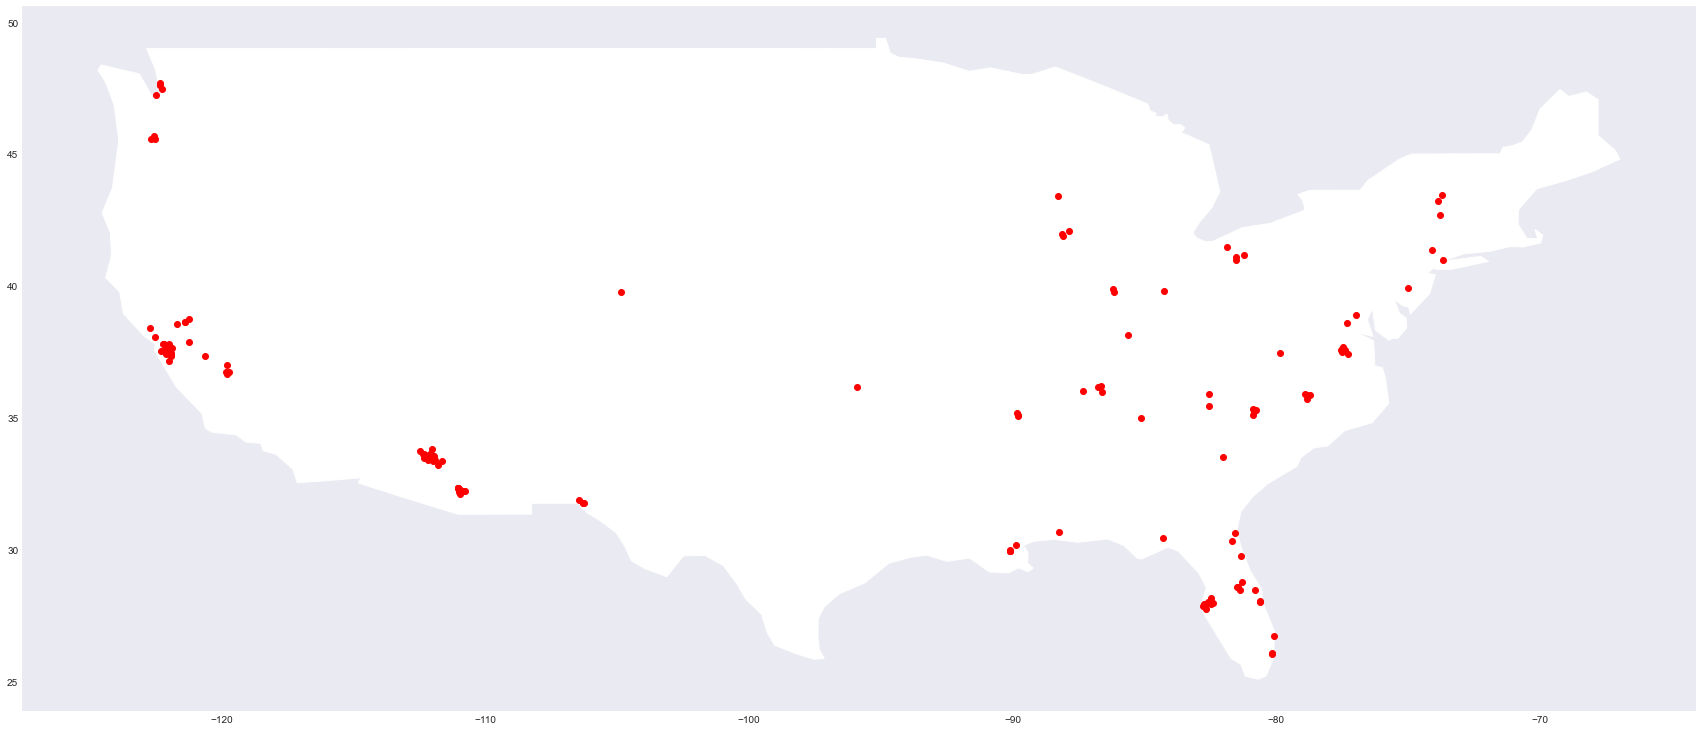

In [57]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.plot(
    color='white', edgecolor='white')

gdf_sample_sev1.plot(ax=ax, color='red')

plt.show()

#### Severity 2 accidents

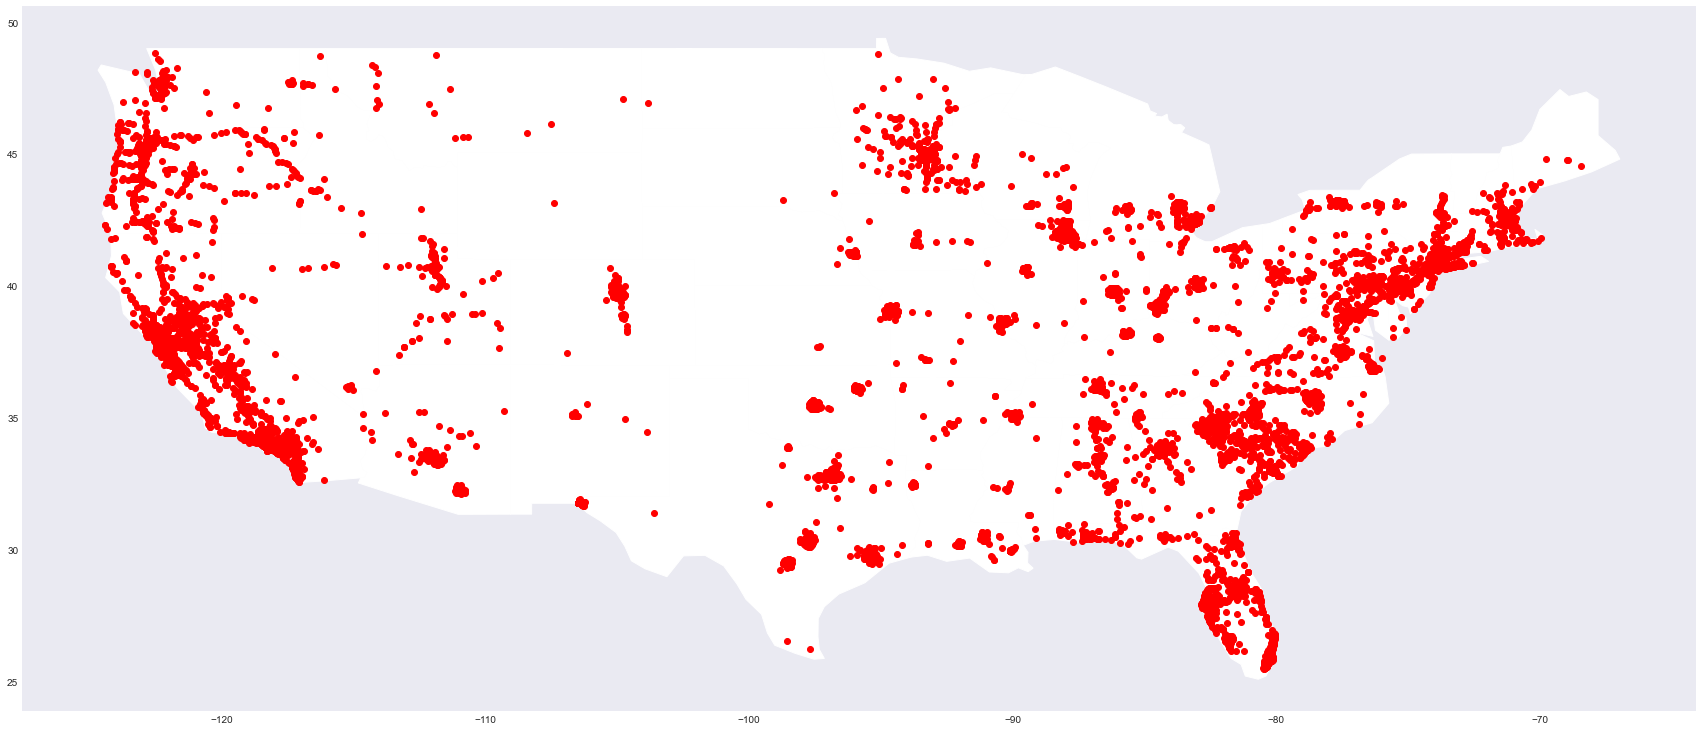

In [58]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.plot(
    color='white', edgecolor='white')

gdf_sample_sev2.plot(ax=ax, color='red')

plt.show()

#### Severity 3 accidents

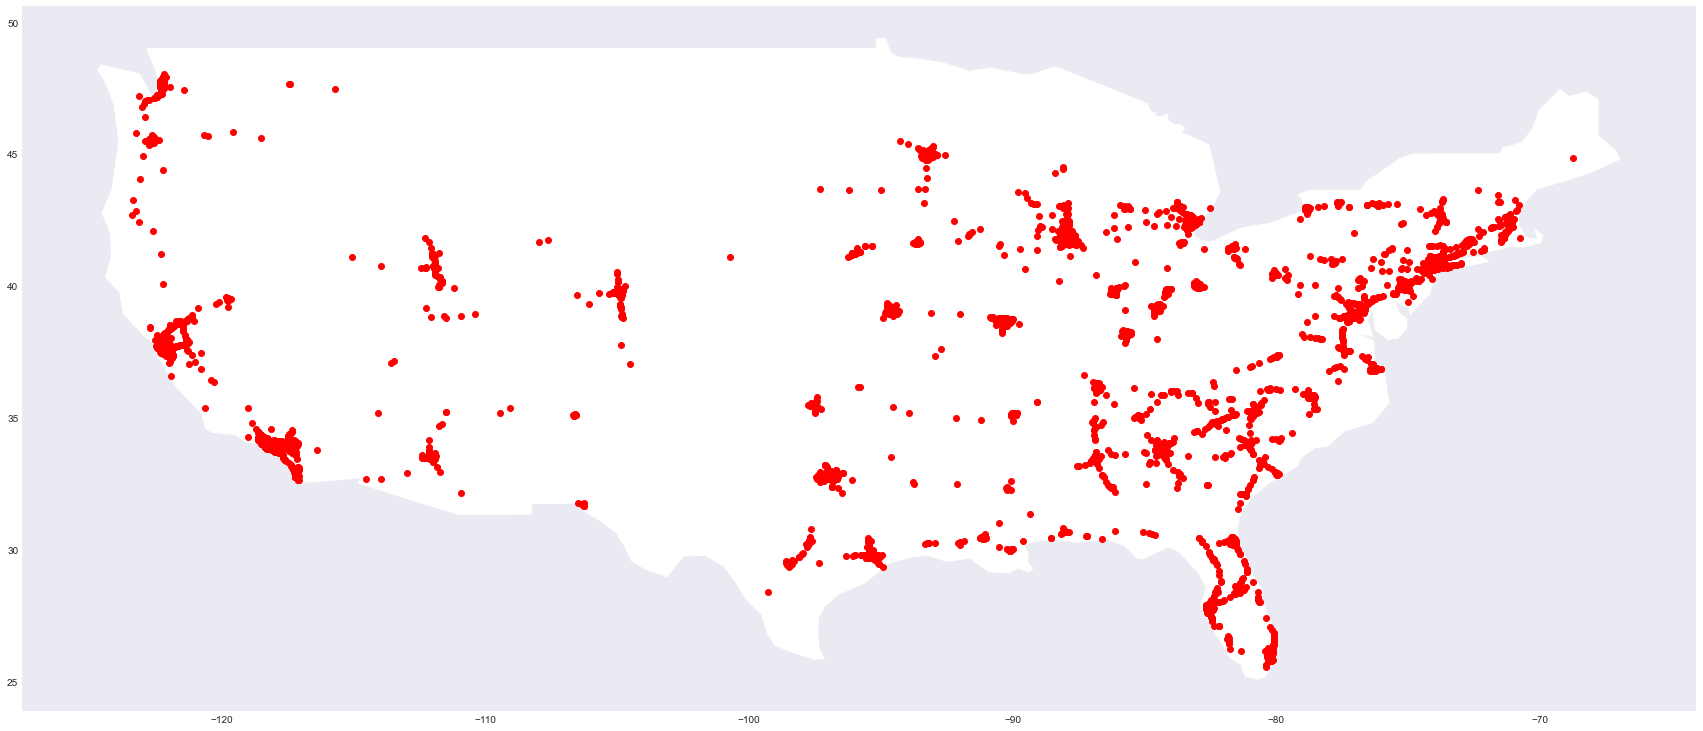

In [59]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.plot(
    color='white', edgecolor='white')

gdf_sample_sev3.plot(ax=ax, color='red')

plt.show()

#### Severity 4 accidents

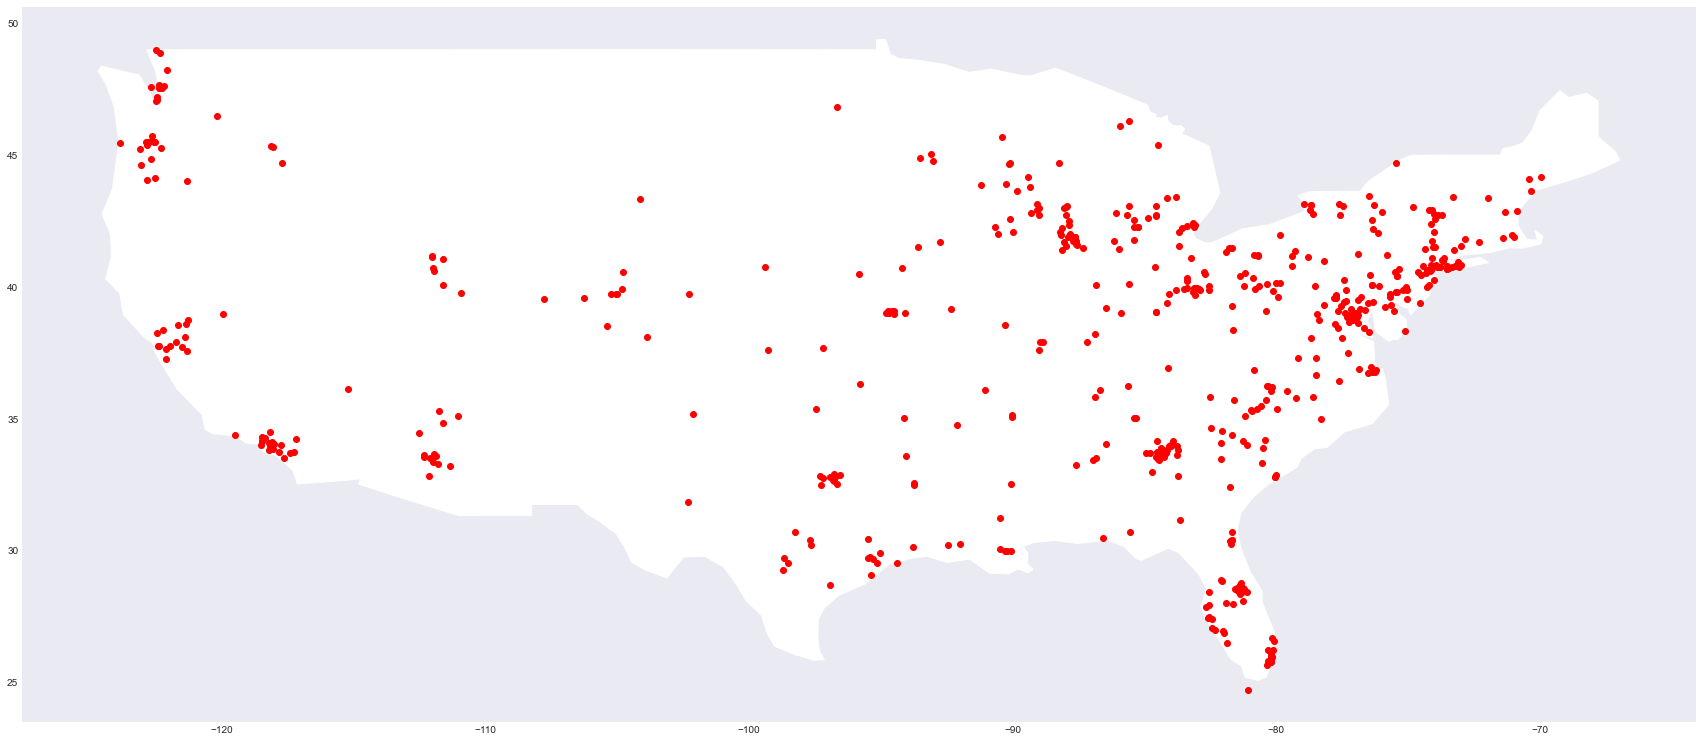

In [60]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.plot(
    color='white', edgecolor='white')

gdf_sample_sev4.plot(ax=ax, color='red')

plt.show()

### Definition von Hot Spots

In [61]:
df_ppt_cat["is_HotSpot_10m"] = 0
df_ppt_cat["is_HotSpot_100m"] = 0

#### Schwelle für Hot Spot - 40 accidents. Hot spots mit Genauigkeit 10m und 100m werden in den nächsten 2 Zellen definiert.

In [62]:
hot_spots_cat = df_ppt_cat.Coordinates_10m.value_counts()[
    df_ppt_cat.Coordinates_10m.value_counts() >= 40]

df_ppt_cat.loc[df_ppt_cat.Coordinates_10m.isin(list(hot_spots_cat.index)), "is_HotSpot_10m"] = 1

In [63]:
hot_spots_cat = df_ppt_cat.Coordinates_100m.value_counts()[
    df_ppt_cat.Coordinates_100m.value_counts() >= 40]

df_ppt_cat.loc[df_ppt_cat.Coordinates_100m.isin(list(hot_spots_cat.index)), "is_HotSpot_100m"] = 1

#### Wie viele Unfälle passieren in Hot Spots?

In [64]:
print("The accidents in 10m hot spots are {} of all accidents. \
The accidents in 100m hot spots are {} of all accidents".format(
    (str(round(df_ppt_cat.is_HotSpot_10m.mean()*100,2))+" %"),
    (str(round(df_ppt_cat.is_HotSpot_100m.mean()*100,2))+" %")))

The accidents in 10m hot spots are 16.78 % of all accidents. The accidents in 100m hot spots are 30.5 % of all accidents


### Präsentation der Hot Spots auf der USA Karte

In [65]:
hot_spot100m_only_gps = df_ppt_cat.loc[df_ppt_cat.is_HotSpot_100m ==1][["Start_Lat", "Start_Lng"]]
hot_spot10m_only_gps = df_ppt_cat.loc[df_ppt_cat.is_HotSpot_10m ==1][["Start_Lat", "Start_Lng"]]

In [66]:
gdf_hot100 = gpd.GeoDataFrame(hot_spot100m_only_gps, 
                              geometry=gpd.points_from_xy(hot_spot100m_only_gps.Start_Lng, 
                              hot_spot100m_only_gps.Start_Lat))

In [67]:
gdf_hot10 = gpd.GeoDataFrame(hot_spot10m_only_gps, 
                              geometry=gpd.points_from_xy(hot_spot10m_only_gps.Start_Lng, 
                              hot_spot10m_only_gps.Start_Lat))

#### Einführung von Metropolien mit mindestens 300k Einwohner für bessere Orientierung

In [68]:
continental_USA_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_USA_cities = continental_USA_cities.query('STATE not in ["AK", "HI", "PR"]')
continental_USA_cities_more500k = continental_USA_cities.query('POP_2010 > 300000')

#### Hot spot Genauigkeitsniveau = 100m

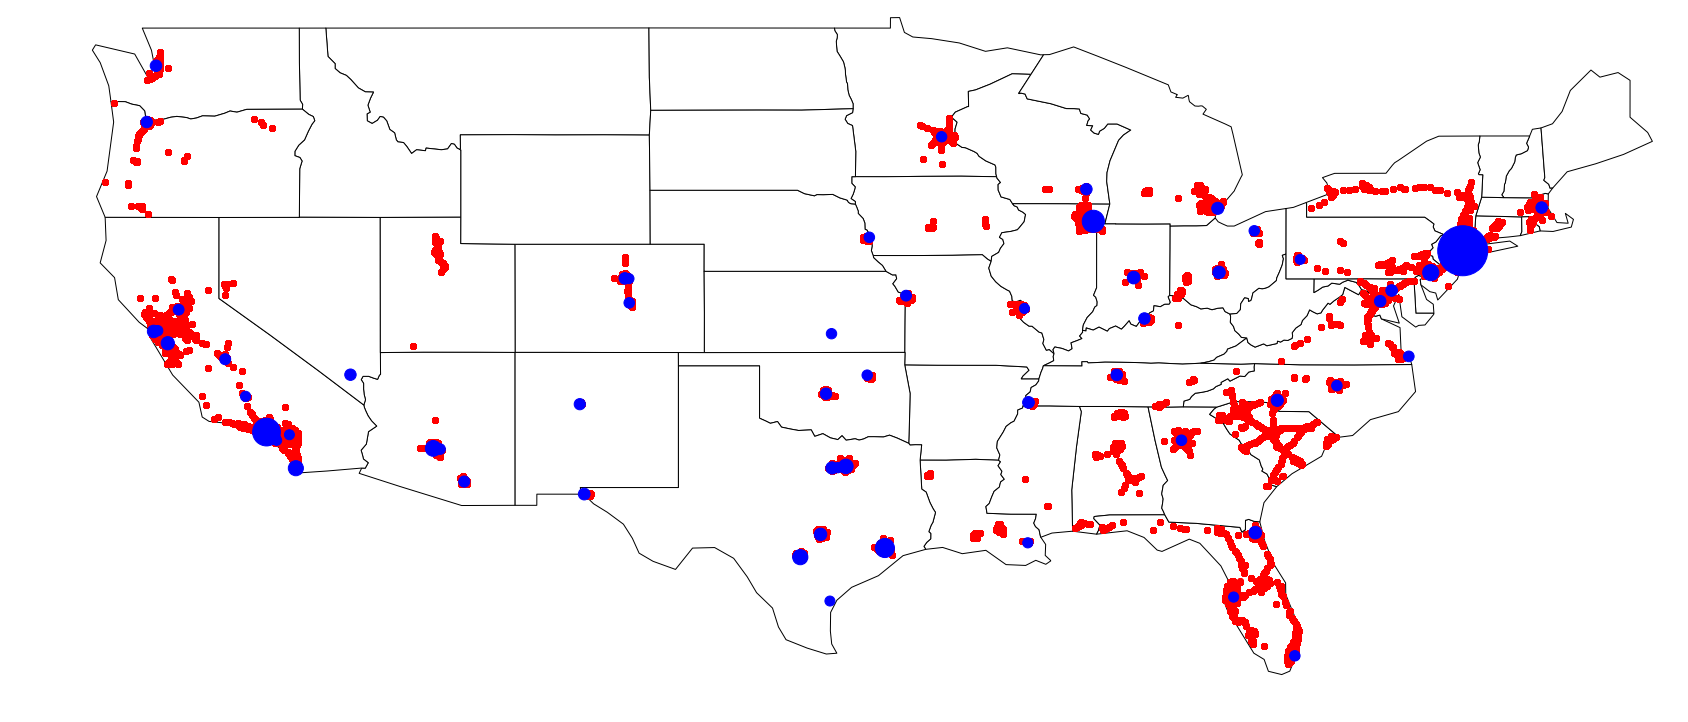

In [69]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.plot(
    color='white', edgecolor='black')

gdf_hot100.plot(ax=ax, color='red')
gplt.pointplot(continental_USA_cities_more500k, ax = ax, color = 'blue', scale = "POP_2010", limits=(10, 50))
plt.show()

#### Hot spot Genauigkeitsniveau = 10m

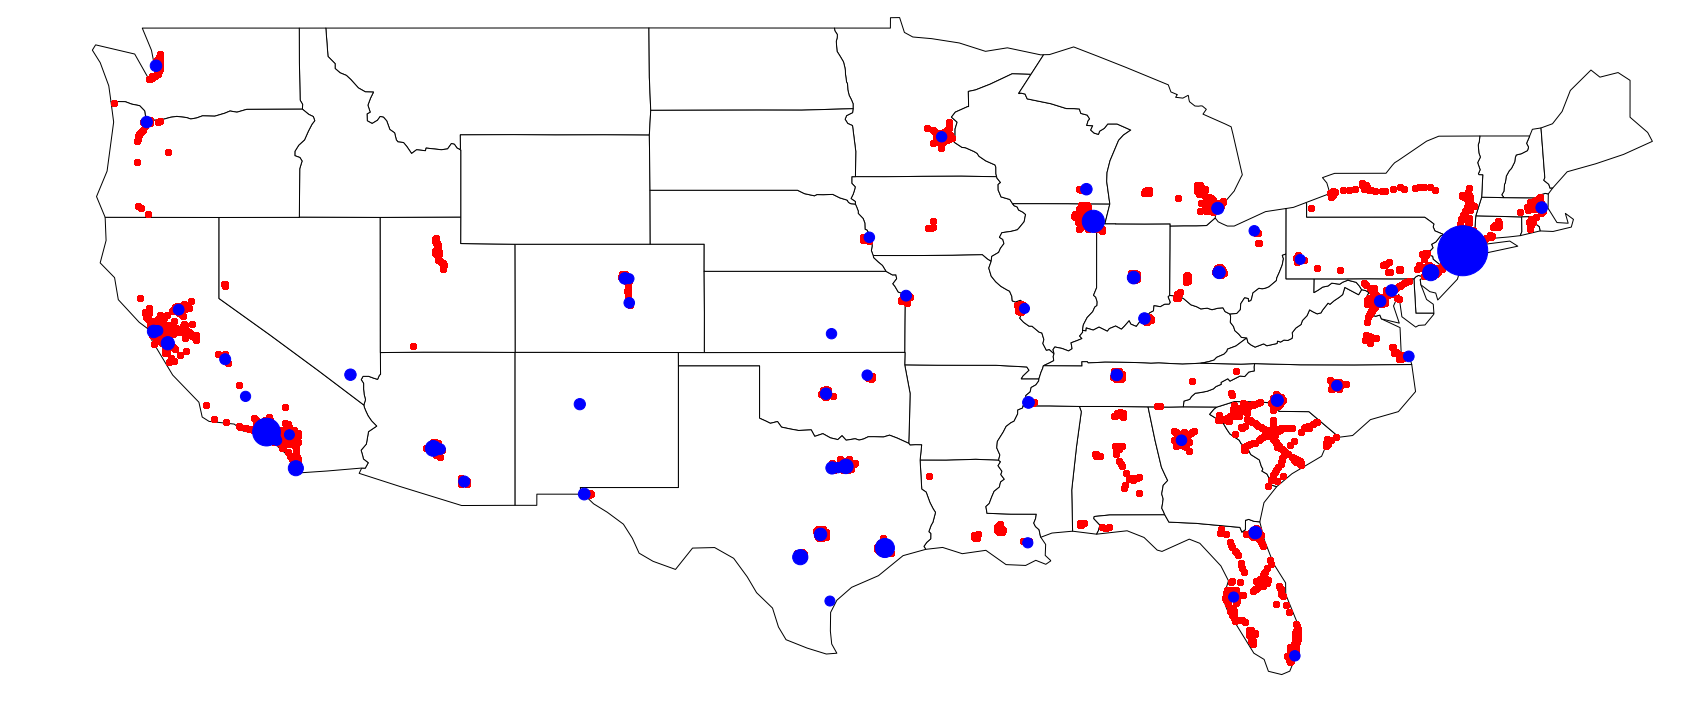

In [70]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.plot(
    color='white', edgecolor='black')
gdf_hot10.plot(ax=ax, color='red')

gplt.pointplot(continental_USA_cities_more500k, ax = ax, color = 'blue', scale = "POP_2010", limits=(10, 50))
plt.show()

In [71]:
data_frame_for_depiction = df_ppt_cat.query("(State == 'UT' | State == 'NY'| State == 'SC') & \
                                            is_HotSpot_10m")

In [72]:
gdf_hot10_depict = gpd.GeoDataFrame(data_frame_for_depiction, 
                              geometry=gpd.points_from_xy(data_frame_for_depiction.Start_Lng, 
                              data_frame_for_depiction.Start_Lat))

#### Interessante Punkte. Unfälle in diesen Orten sind höchstwahrscheinlich durch die reinen Menschfehler iniziert. Die unten dargestellten Zonen sind weit von Bereichen des intensiven Verkehrs (mit Ausnahme NY City)

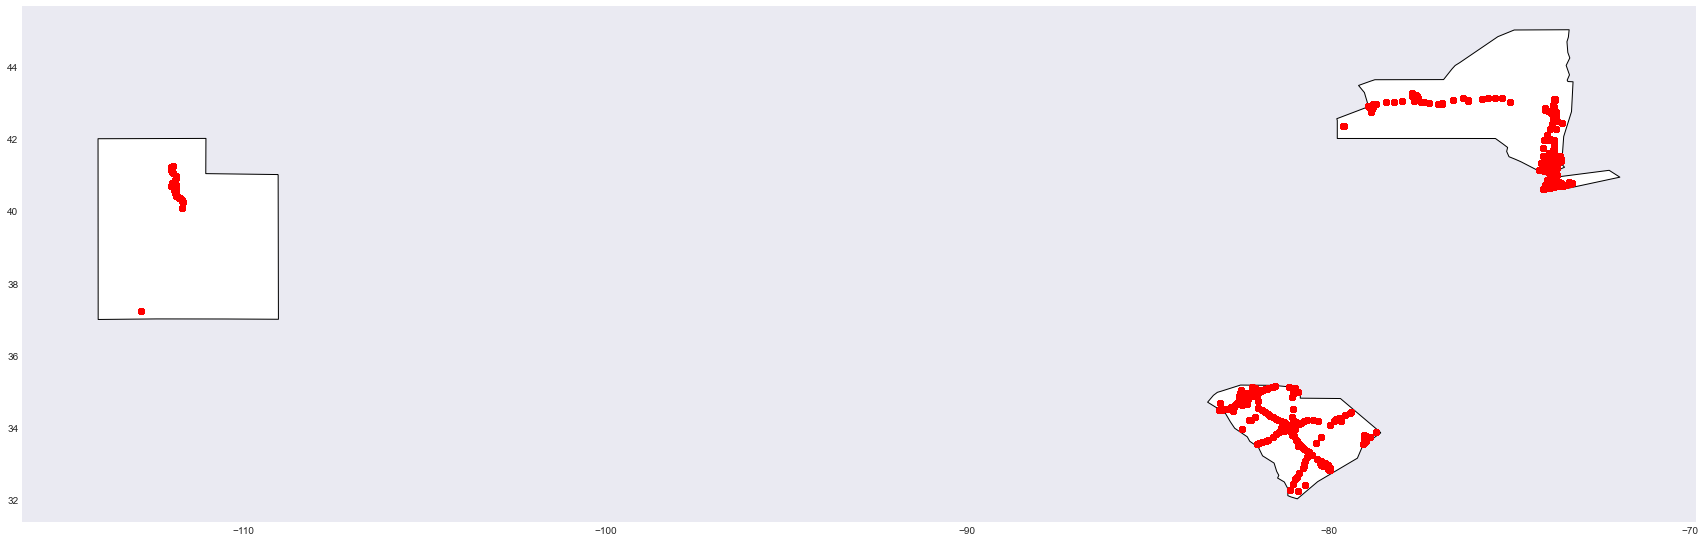

In [73]:
rcParams['figure.figsize'] = 30, 30

ax = continental_USA.query("state == 'Utah' | state == 'New York'| state == 'South Carolina'").plot(
    color='white', edgecolor='black')

gdf_hot10_depict.plot(ax=ax, color='red')
plt.show()

In [74]:
df_hot_spots_10m = df_ppt_cat.query("is_HotSpot_10m == 1")
df_hot_spots_100m = df_ppt_cat.query("is_HotSpot_100m == 1")

In [75]:
print("Hot Spots (accuracy ~10m) - percentual [%] presence of road objects and facilities\
      \n \nRoundabouts       {}\
      \nStop signs        {}\
      \nRailways          {}\
      \nJunctions         {}\
      \nRight of way      {}\
      \nTraffic Signal    {}\
      \nStation           {}\
      \nCrossing          {}\
      \nBump              {}\
      \nAmenity           {}".format(
            round(df_hot_spots_10m.Roundabout.mean()*100, 2), 
            round(df_hot_spots_10m.Stop.mean()*100, 2) ,
            round(df_hot_spots_10m.Railway.mean()*100, 2) ,
            round(df_hot_spots_10m.Junction.mean()*100, 2) ,
            round(df_hot_spots_10m.Give_Way.mean()*100, 2) ,
            round(df_hot_spots_10m.Traffic_Signal.mean()*100, 2) ,
            round(df_hot_spots_10m.Station.mean()*100, 2) ,
            round(df_hot_spots_10m.Crossing.mean()*100, 2) ,
            round(df_hot_spots_10m.Bump.mean()*100, 2),
            round(df_hot_spots_10m.Amenity.mean()*100, 2)))

Hot Spots (accuracy ~10m) - percentual [%] presence of road objects and facilities      
 
Roundabouts       0.0      
Stop signs        0.48      
Railways          0.87      
Junctions         11.18      
Right of way      0.29      
Traffic Signal    19.2      
Station           1.33      
Crossing          6.47      
Bump              0.01      
Amenity           0.4


In [76]:
print("Hot Spots (accuracy ~10m) - percentual [%] presence of particular weather conditions\
      \n \nAfter_Sunset                                        {}\
      \nPrecipitation_Category_No_Precipitation             {}\
      \nPrecipitation_Category_Questionable_Precipitation   {}\
      \nWeather_Condition_Clear                             {}\
      \nWeather_Condition_Cloudy                            {}\
      \nWeather_Condition_Fair                              {}\
      \nWeather_Condition_Light_Rain                        {}\
      \nWeather_Condition_Mostly_Cloudy                     {}\
      \nWeather_Condition_Overcast                          {}\
      \nWeather_Condition_Partly_Cloudy                     {}\
      \nWeather_Condition_Scattered_Clouds                  {}".format(
            round(df_hot_spots_10m.After_Sunset.mean()*100,2),
            round(df_hot_spots_10m.Precipitation_Category_No_Precipitation.mean()*100, 2), 
            round(df_hot_spots_10m.Precipitation_Category_Questionable_Precipitation.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Clear.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Cloudy.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Fair.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Light_Rain.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Mostly_Cloudy.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Overcast.mean()*100, 2) ,
            round(df_hot_spots_10m.Weather_Condition_Partly_Cloudy.mean()*100, 2),
            round(df_hot_spots_10m.Weather_Condition_Scattered_Clouds.mean()*100, 2)))

Hot Spots (accuracy ~10m) - percentual [%] presence of particular weather conditions      
 
After_Sunset                                        26.11      
Precipitation_Category_No_Precipitation             59.77      
Precipitation_Category_Questionable_Precipitation   32.89      
Weather_Condition_Clear                             20.34      
Weather_Condition_Cloudy                            5.8      
Weather_Condition_Fair                              18.16      
Weather_Condition_Light_Rain                        5.31      
Weather_Condition_Mostly_Cloudy                     15.76      
Weather_Condition_Overcast                          9.91      
Weather_Condition_Partly_Cloudy                     11.15      
Weather_Condition_Scattered_Clouds                  6.44


In [77]:
print("Hot Spots (accuracy ~100m) - percentual [%] presence of road objects and facilities\
      \n \nRoundabouts       {}\
      \nStop signs        {}\
      \nRailways          {}\
      \nJunctions         {}\
      \nRight of way      {}\
      \nTraffic Signal    {}\
      \nStation           {}\
      \nCrossing          {}\
      \nBump              {}\
      \nAmenity           {}".format(
            round(df_hot_spots_100m.Roundabout.mean()*100, 2), 
            round(df_hot_spots_100m.Stop.mean()*100, 2) ,
            round(df_hot_spots_100m.Railway.mean()*100, 2) ,
            round(df_hot_spots_100m.Junction.mean()*100, 2) ,
            round(df_hot_spots_100m.Give_Way.mean()*100, 2) ,
            round(df_hot_spots_100m.Traffic_Signal.mean()*100, 2) ,
            round(df_hot_spots_100m.Station.mean()*100, 2) ,
            round(df_hot_spots_100m.Crossing.mean()*100, 2) ,
            round(df_hot_spots_100m.Bump.mean()*100, 2),
            round(df_hot_spots_100m.Amenity.mean()*100, 2)))

Hot Spots (accuracy ~100m) - percentual [%] presence of road objects and facilities      
 
Roundabouts       0.0      
Stop signs        0.49      
Railways          0.84      
Junctions         12.0      
Right of way      0.34      
Traffic Signal    19.16      
Station           1.32      
Crossing          6.87      
Bump              0.01      
Amenity           0.49


In [78]:
print("Hot Spots (accuracy ~100m) - percentual [%] presence of particular weather conditions\
      \n \nAfter_Sunset                                        {}\
      \nPrecipitation_Category_No_Precipitation             {}\
      \nPrecipitation_Category_Questionable_Precipitation   {}\
      \nWeather_Condition_Clear                             {}\
      \nWeather_Condition_Cloudy                            {}\
      \nWeather_Condition_Fair                              {}\
      \nWeather_Condition_Light_Rain                        {}\
      \nWeather_Condition_Mostly_Cloudy                     {}\
      \nWeather_Condition_Overcast                          {}\
      \nWeather_Condition_Partly_Cloudy                     {}\
      \nWeather_Condition_Scattered_Clouds                  {}".format(
            round(df_hot_spots_100m.After_Sunset.mean()*100,2),
            round(df_hot_spots_100m.Precipitation_Category_No_Precipitation.mean()*100, 2), 
            round(df_hot_spots_100m.Precipitation_Category_Questionable_Precipitation.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Clear.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Cloudy.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Fair.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Light_Rain.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Mostly_Cloudy.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Overcast.mean()*100, 2) ,
            round(df_hot_spots_100m.Weather_Condition_Partly_Cloudy.mean()*100, 2),
            round(df_hot_spots_100m.Weather_Condition_Scattered_Clouds.mean()*100, 2)))

Hot Spots (accuracy ~100m) - percentual [%] presence of particular weather conditions      
 
After_Sunset                                        27.83      
Precipitation_Category_No_Precipitation             63.48      
Precipitation_Category_Questionable_Precipitation   29.23      
Weather_Condition_Clear                             18.39      
Weather_Condition_Cloudy                            6.93      
Weather_Condition_Fair                              21.34      
Weather_Condition_Light_Rain                        5.28      
Weather_Condition_Mostly_Cloudy                     15.29      
Weather_Condition_Overcast                          8.93      
Weather_Condition_Partly_Cloudy                     10.8      
Weather_Condition_Scattered_Clouds                  5.51


### Die obere Statistik zeigt, dass die Unfall Hot Spots weder mit bestimmten Wetterverhältnissen noch mit Vorhandensein von bestimmter Infrastruktur zusammenhängen. Man kann behaupten, dass der Hauptfaktor für Unfallhäufigkeit nimmt seinen Ursprung im etwas anders wie zum Beispiel rücksichtlosen Fahren. Die Bestätigung solcher Hypothese erfordert jedoch weitere Analysen.

## 5 Inferential Statistics - Antizipationsversuch der Unfallschwere mit Hilfe von multi layer perceptron classifier

### a. Predictions basierend auf originalem data set

#### Entfernung von Eigenschaften die für das ML Model nicht notwendig sind

In [79]:
df_ppt_cat_pred_Sev = df_ppt_cat.drop(axis =1 , 
            columns = ["ID", "State", "Street", "City", "County", 
                       "Coordinates_10m", "Coordinates_100m", "Start_Lat", "Start_Lng"])

In [80]:
variables = df_ppt_cat_pred_Sev.drop(axis = 1, columns = ["Severity"])

#### Korrelationen

In [81]:
correlations = df_ppt_cat_pred_Sev.corr()['Severity']

In [82]:
correlations

TMC                                                      0.104953
Severity                                                 1.000000
Distance_mi                                              0.121532
Temperature_F                                           -0.002723
Humidity_%                                               0.014939
Pressure_in                                              0.039913
Visibility_mi                                           -0.005180
Wind_Speed_mph                                           0.052331
Amenity                                                 -0.038825
Bump                                                    -0.003716
Crossing                                                -0.129750
Give_Way                                                -0.008061
Junction                                                 0.052462
No_Exit                                                 -0.006889
Railway                                                 -0.020553
Roundabout

#### Nur die Eigenschaften die mehr als 0,05 Korrelationsfaktor im Hinblick auf Unfallschwere haben werden weiterbehandelt

In [83]:
correlated_values = correlations.index[(correlations.values >= 0.05) | (correlations.values <= -0.05)]

In [84]:
not_correlated = df_ppt_cat_pred_Sev.drop(list(correlated_values), axis = 1)

In [85]:
df_ppt_cat_pred_Sev_only_correlated = df_ppt_cat_pred_Sev.drop(list(not_correlated.columns), axis = 1)

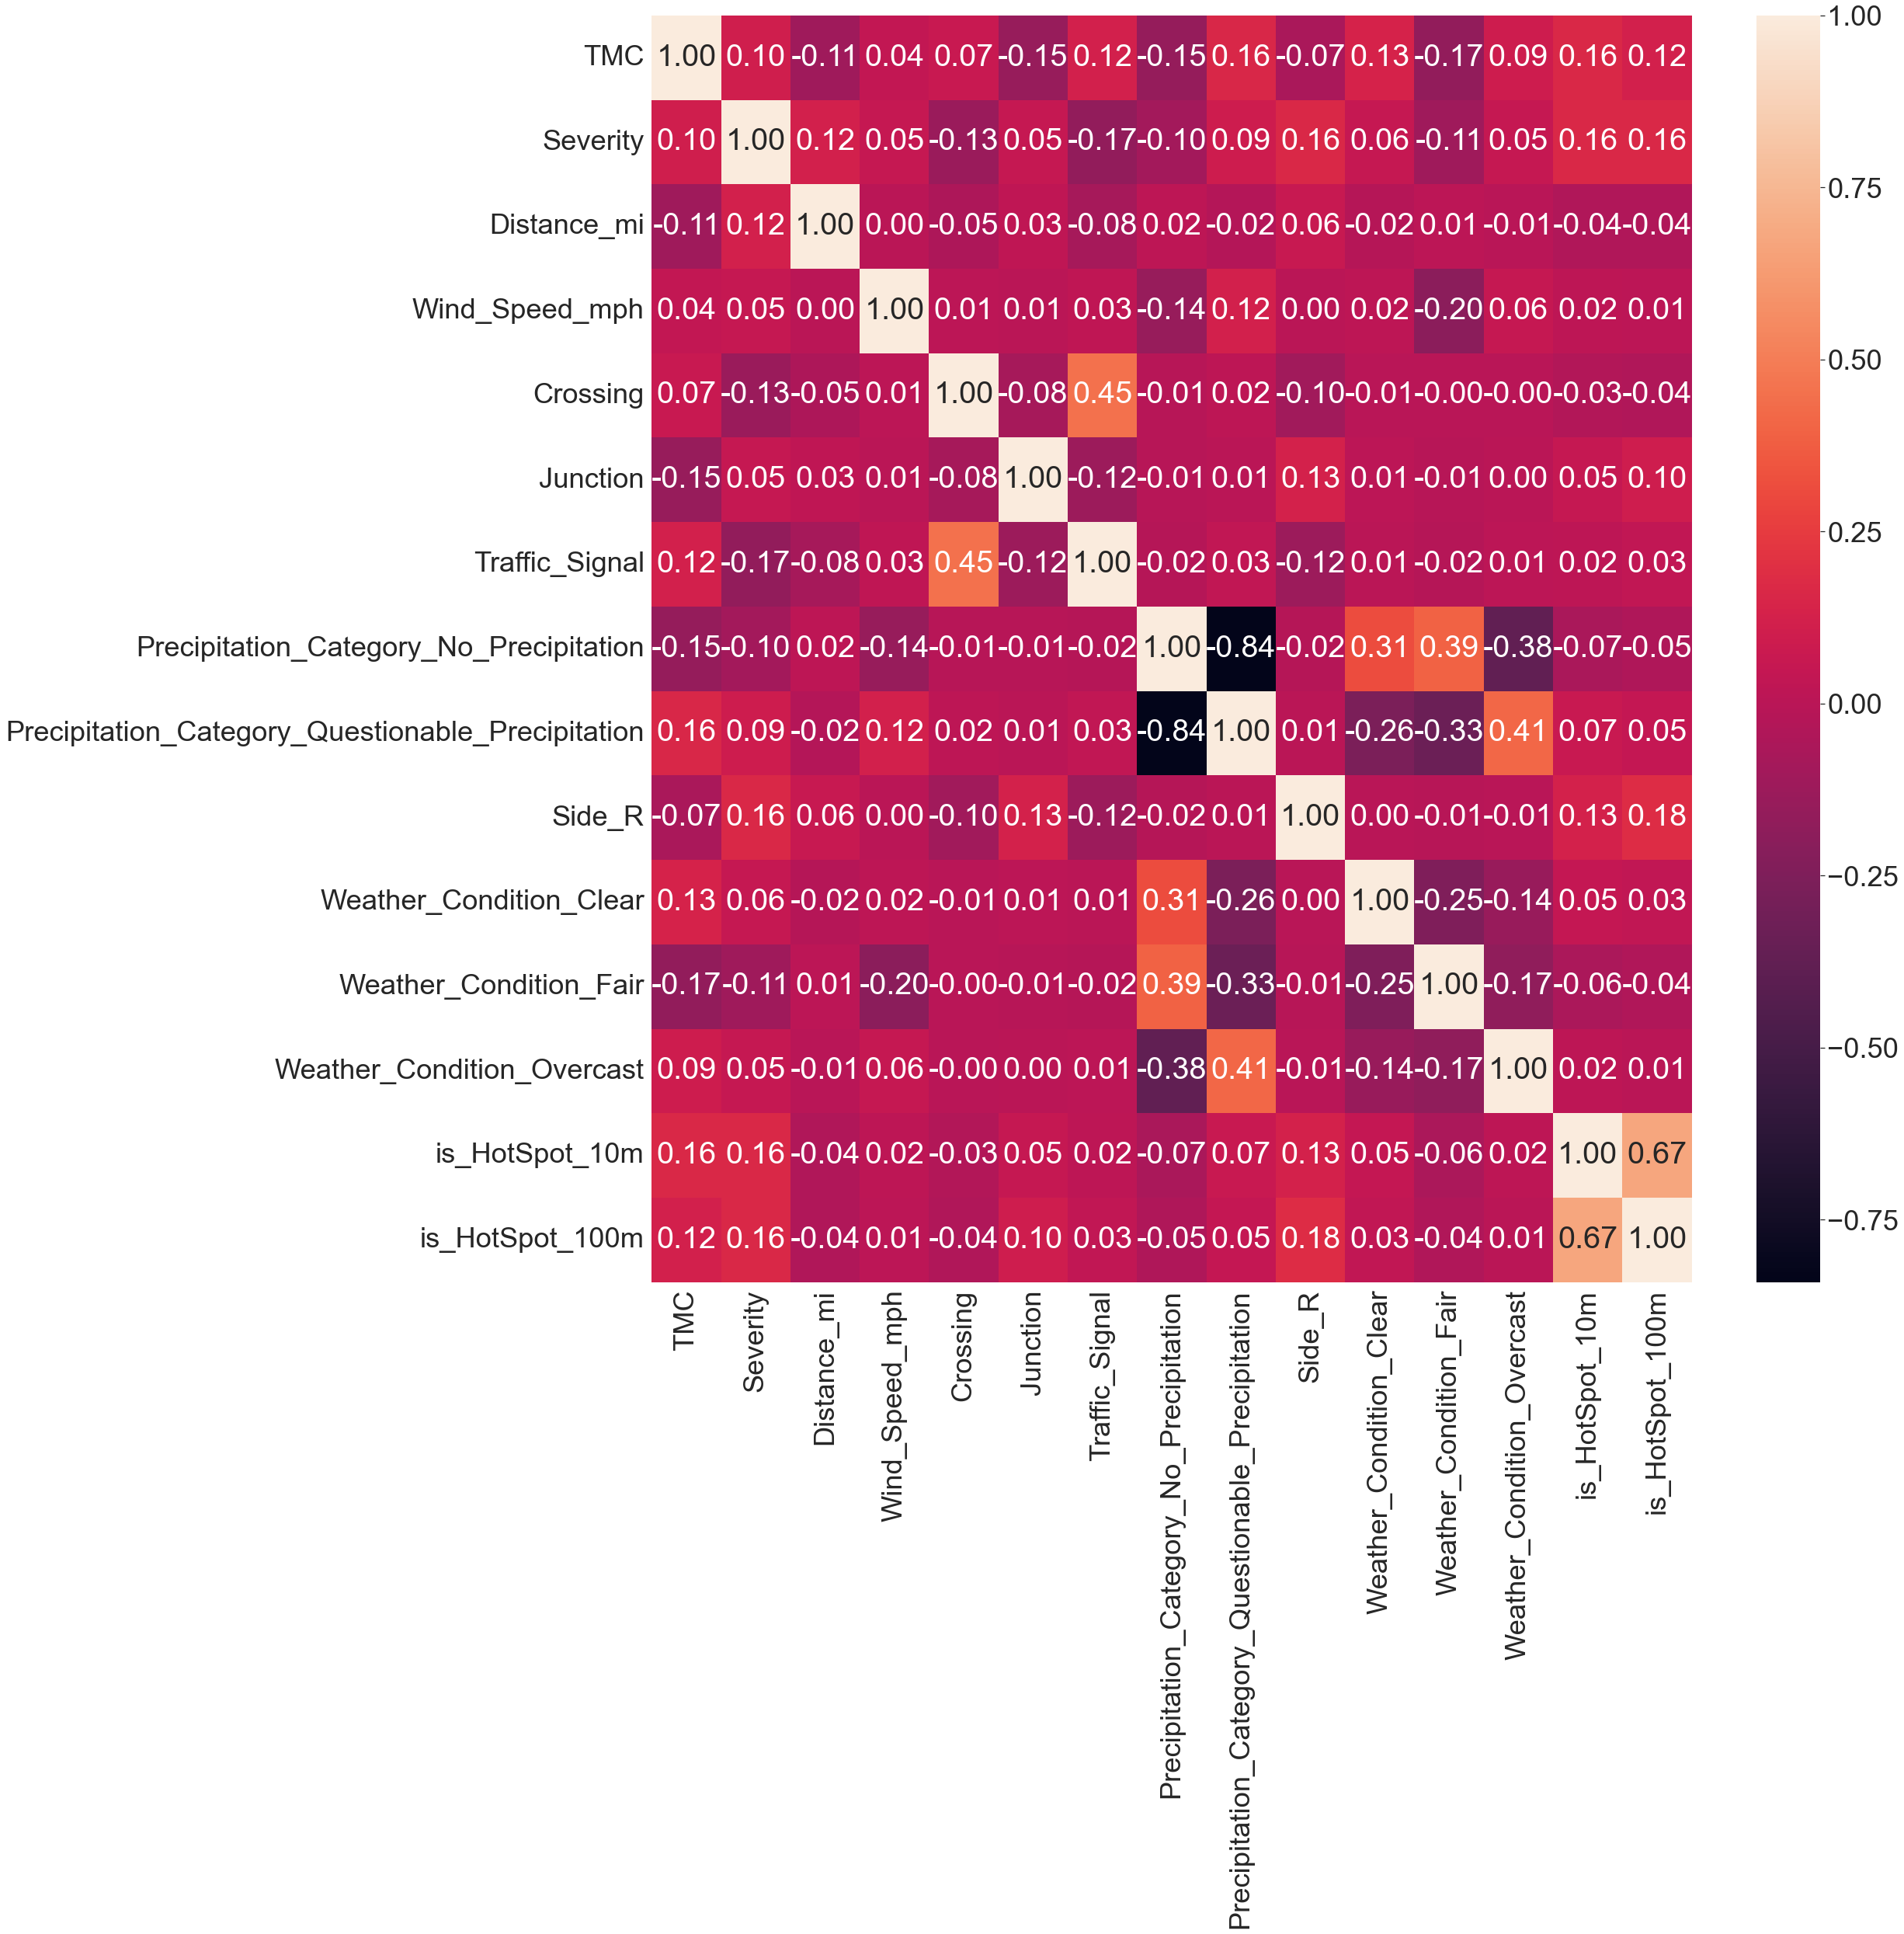

In [86]:
sns.set(font_scale=3.3)
sns.heatmap(df_ppt_cat_pred_Sev_only_correlated.corr(), annot = True, fmt = '.2f');

In [87]:
variables.drop(axis = 1, columns = [x for x in variables.columns if x not in correlated_values],
               inplace = True)

#### Konstruktion von Matrizen und deren Standarisierung

In [88]:
features = variables.values.reshape(-1,variables.shape[1])

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [89]:
features

array([[ 0.76495927, -0.20596859, -0.82860815, ...,  3.24808409,
        -0.44904144, -0.66250948],
       [ 0.76495927, -0.20596859, -0.6217008 , ..., -0.3078738 ,
         2.22696596,  1.50941235],
       [ 0.76495927, -0.20596859, -0.82860815, ..., -0.3078738 ,
        -0.44904144,  1.50941235],
       ...,
       [-1.30725914,  0.14101825,  0.3940262 , ..., -0.3078738 ,
        -0.44904144, -0.66250948],
       [-1.30725914,  0.27389343,  0.01783101, ..., -0.3078738 ,
         2.22696596,  1.50941235],
       [-1.30725914,  0.12590449, -0.17026658, ..., -0.3078738 ,
        -0.44904144, -0.66250948]])

In [90]:
labels = df_ppt_cat_pred_Sev["Severity"].values.reshape(-1,1)
labels = np.ravel(labels)

In [91]:
labels

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

#### Train test split (20% der Daten wird als Testdaten benutzt)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True)

In [93]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2971107, 14)
Training Labels Shape: (2971107,)
Testing Features Shape: (742777, 14)
Testing Labels Shape: (742777,)


### Da wir mehrere Klassen antizipieren müssen (Schwere 1-4) ist es sinvoll den multilayer-perceptron classifier zu nutzen. Einfache Skizze unten zeigt wie funktioniert dieses Model.

![mlp](multi_layer_perceptron.jpg) <br/>
Die Input Layers sind die Eigenschaften die fürs Training genutzt werden. Die Skalarprodukt von Input und seinem Gewicht sind weitergeleitet zur verdeckten Schicht (hidden layer), eingeführt in die "activation function" und weitergeleitet zur nächsten Schicht. Nach der Transformation in der letzten verdeckten Schicht wird der Output erreicht (label). Die Anzahl der Transformationen kann in erstem Schritt mit Hilfe der folgenden Formel definiert werden.

- (Input_nodes + Output_nodes) / 2
- Input_nodes = number_of_variables = 14
- Output_loads = number of outcome classes = 3 -> Severity_1, 2 or 3. The 4 is given when we have neither 1 nor 2 nor 3
- Hence the hyperparameter for the classifier is (14+3)/2 = 8,5 -> 9

In [95]:
mlp_class = MLPClassifier(max_iter=10000, hidden_layer_sizes=(9,))

In [96]:
mlp_class.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(9,), max_iter=10000)

In [97]:
mlp_pred = mlp_class.predict(X_test)

In [98]:
result_model = len(mlp_pred[(mlp_pred /  y_test) ==1]) / len(y_test)

In [99]:
result_model

0.7722667772426987

#### The result seem to be ok but let's consider the accuracy with regard to single classes

In [100]:
results = pd.DataFrame()
results["predictions"] = mlp_pred
results["labels"] = y_test

In [101]:
predictions_unbalanced_DS = [
round(100*len(results.loc[(results.labels == 1) & (results.predictions ==1)]) / len(y_test[y_test==1]),2),
round(100*len(results.loc[(results.labels == 2) & (results.predictions ==2)]) / len(y_test[y_test==2]),2),
round(100*len(results.loc[(results.labels == 3) & (results.predictions ==3)]) / len(y_test[y_test==3]),2), 
round(100*len(results.loc[(results.labels == 4) & (results.predictions ==4)]) / len(y_test[y_test==4]),2)]



print("Percantage of correct predictions in case of balanced data set for: \n \
Severity 1    {} \n \
Severity 2    {} \n \
Severity 3    {} \n \
Severity 4    {}".format(
    round(predictions_unbalanced_DS[0],2),
    round(predictions_unbalanced_DS[1],2),
    round(predictions_unbalanced_DS[2],2),
    round(predictions_unbalanced_DS[3],2)))

Percantage of correct predictions in case of balanced data set for: 
 Severity 1    0.24 
 Severity 2    91.3 
 Severity 3    46.87 
 Severity 4    7.64


#### Die Leistung des Models ist verzerrt durch die gute Vorhersage für die zahlreichste Klasse (Severity 2)!
#### Das Model liefert schlechte Ergebnisse, wenn es um die Antizipation von seltenen Klassen 1 oder 4 geht!

#### Darüber hinaus wenn wir Mode Baseline wählen (also immer Wahl von Severity 2) - dann das Model liefert nur 5% bessere Genauigkeit

In [102]:
df_ppt_cat.Severity.value_counts().values.max() / df_ppt_cat.Severity.value_counts().sum()

0.7168328359205619

In [103]:
result_modeBaseline = df_ppt_cat.Severity.value_counts().values.max() / df_ppt_cat.Severity.value_counts().sum()

In [104]:
result_model - result_modeBaseline

0.05543394132213675

#### Ein Hilfsmittel kann der so genannte undersampling sein. DataSet wird so undersampled, dass alle Labels mit gleicher Anzahl von Datensätze representiert werden.

### b. Predictions basierend auf undersampled data set

In [105]:
df_ppt_cat_undersample = df_ppt_cat_pred_Sev

#### Referenz wird die Klasse 1 sein (Severity 1)

In [106]:
df_Severity_2 = df_ppt_cat_undersample.query("Severity == 2").sample(n
                                                                     =df_ppt_cat_undersample.Severity.value_counts().min())
df_Severity_3 = df_ppt_cat_undersample.query("Severity == 3").sample(n
                                                                     =df_ppt_cat_undersample.Severity.value_counts().min())
df_Severity_4 = df_ppt_cat_undersample.query("Severity == 4").sample(n
                                                                     =df_ppt_cat_undersample.Severity.value_counts().min())

In [107]:
df_ppt_cat_undersample = df_ppt_cat_undersample.query("Severity ==1").append(
    [df_Severity_2,df_Severity_3,df_Severity_4])

In [108]:
df_ppt_cat_undersample.reset_index(inplace = True)
df_ppt_cat_undersample.drop(columns = 'index', axis = 1, inplace = True)

In [109]:
variables = df_ppt_cat_undersample.drop(axis = 1, columns = ["Severity"])

In [110]:
correlations = df_ppt_cat_undersample.corr()['Severity']

#### Nur die Eigenschaften die mehr als 0,05 Korrelationsfaktor im Hinblick auf Unfallschwere haben werden weiterbehandelt

In [112]:
correlated_values = correlations.index[(correlations.values >= 0.05) | (correlations.values <= -0.05)]

C:\Users\x\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
C:\Users\x\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [113]:
variables.drop(axis = 1, columns = [x for x in variables.columns if x not in correlated_values],
               inplace = True)

In [114]:
variables.head()

,TMC,Distance_mi,Temperature_F,Humidity_%,Pressure_in,Visibility_mi,Crossing,Station,Traffic_Signal,After_Sunset,...,Weather_Condition_Scattered_Clouds,Wind_Direction_East,Wind_Direction_North,Wind_Direction_S,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_West,Duration_minutes
0,1,0.00,33.1,82.0,29.95,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
1,1,0.00,46.0,86.0,29.46,7.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,30.0
2,1,0.00,66.0,42.0,29.94,10.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,45.0
3,1,0.01,48.9,54.0,30.29,10.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,45.0
4,1,0.00,41.0,93.0,30.06,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0


#### Konstruktion von Matrizen und deren Standarisierung

In [115]:
features = variables.values.reshape(-1,variables.shape[1])

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [116]:
labels = df_ppt_cat_undersample["Severity"].values.reshape(-1,1)
labels = np.ravel(labels)

#### Train test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True)

In [118]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (91324, 31)
Training Labels Shape: (91324,)
Testing Features Shape: (22832, 31)
Testing Labels Shape: (22832,)


#### Implementing multilayer-perceptron classifier

In [119]:
mlp_class = MLPClassifier(max_iter=10000, hidden_layer_sizes=(9,))

In [120]:
mlp_class.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(9,), max_iter=10000)

In [121]:
mlp_pred = mlp_class.predict(X_test)

In [122]:
result_model = len(mlp_pred[(mlp_pred /  y_test) ==1]) / len(y_test)

In [124]:
result_model

0.7308163980378416

#### Das obere Rezultat ist nur Spur schlechter als im vorherigen Fall

In [125]:
results = pd.DataFrame()
results["predictions"] = mlp_pred
results["labels"] = y_test

In [126]:
predictions_balanced_DS = [
round(100*len(results.loc[(results.labels == 1) & (results.predictions ==1)]) / len(y_test[y_test==1]),2),
round(100*len(results.loc[(results.labels == 2) & (results.predictions ==2)]) / len(y_test[y_test==2]),2),
round(100*len(results.loc[(results.labels == 3) & (results.predictions ==3)]) / len(y_test[y_test==3]),2), 
round(100*len(results.loc[(results.labels == 4) & (results.predictions ==4)]) / len(y_test[y_test==4]),2)]

print("Percantage of correct predictions in case of balanced data set for: \n \
Severity 1    {} \n \
Severity 2    {} \n \
Severity 3    {} \n \
Severity 4    {}".format(
    round(predictions_balanced_DS[0],2),
    round(predictions_balanced_DS[1],2),
    round(predictions_balanced_DS[2],2),
    round(predictions_balanced_DS[3],2)))

Percantage of correct predictions in case of balanced data set for: 
 Severity 1    89.61 
 Severity 2    45.75 
 Severity 3    75.19 
 Severity 4    81.73


#### Aber liefert deutlich bessere Ergebnisse für alle Klassen außer Severity 2

###  Graphische Representation der Modelleistungen

In [127]:
classes = ["Severity Class 1", "Severity Class 2", "Severity Class 3", "Severity Class 4"]

In [128]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
  
    for rect in ax.patches:
       
        y = rect.get_height()
        x = rect.get_x() + rect.get_width() / 2

        space = spacing     
        vert_align = 'bottom'
    
        if y < 0:          
            space *= -1          
            vert_align = 'top'      
        label = "{:.1f}".format(y)
        
        ax.annotate(
            label,                      
            (x, y),         
            xytext=(0, space),         
            textcoords="offset points",
            ha='center',                
            va=vert_align)                      
                                        


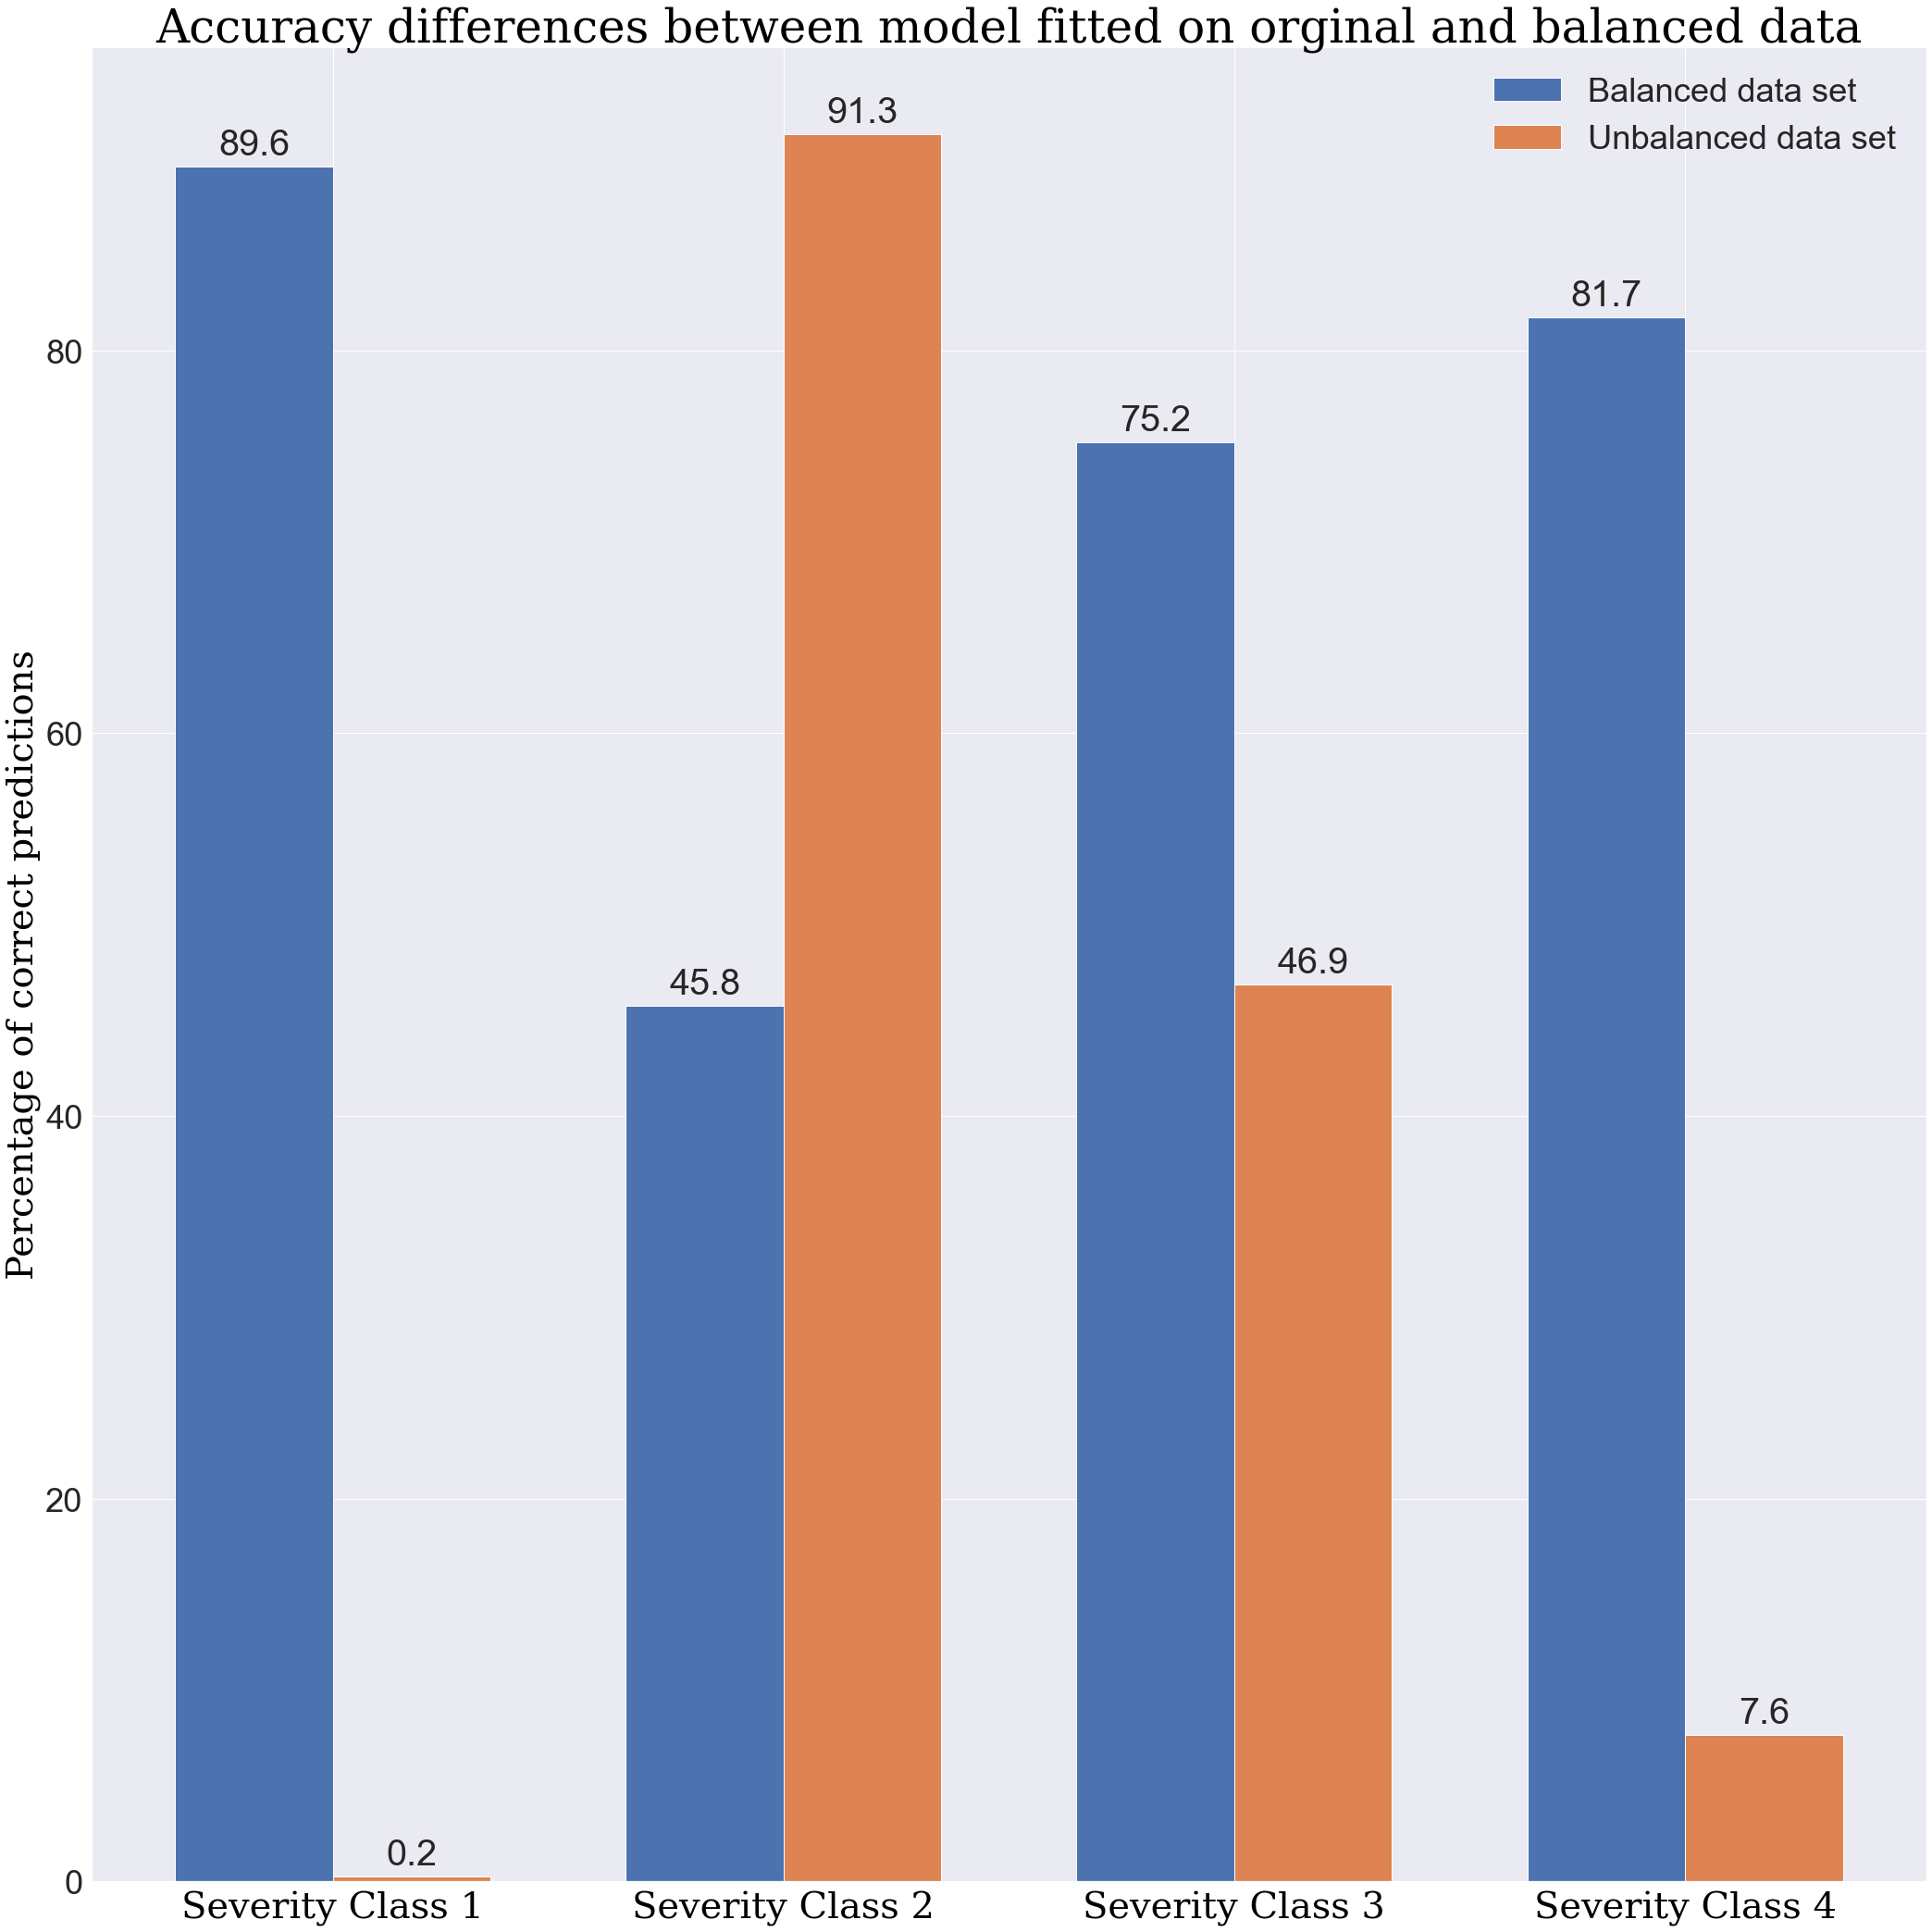

In [129]:
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50,
        }
font_axes = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 40,
        } 

x = np.arange(len(classes))
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predictions_balanced_DS , width, label='Balanced data set')
rects2 = ax.bar(x + width/2, predictions_unbalanced_DS, width, label='Unbalanced data set')


ax.set_ylabel('Percent of correct preditions')
ax.set_title('Accuracy differences between model fitted on orginal and balanced data', fontdict = font_title)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontdict = font_axes)

ax.set_ylabel("Percentage of correct predictions", fontdict = font_axes)
ax.legend()
add_value_labels(ax)

fig.tight_layout()

plt.show()

#  Welches Model ist besser?